In [1]:
import numpy as np
import pandas as pd

С помощью Python мы можем найти среднее значение списка, просто используя функцию mean(). Единственный аргумент этой функции — список данных, на котором необходимо посчитать значение.

В таблице выше представлен ряд данных о весе 20 случайно выбранных клиентов медицинской клиники — 10 мужчин и 10 женщин (в кг). Скопируйте датафрейм, который описывают нашу таблицу, в свой ноутбук и выполните задание.

In [21]:
df = pd.DataFrame({
    'men': [80.2, 80.8, 57.5, 98, 50.5, 73.8, 77.4, 59.7, 77.9, 52.6],
    'women': [57.9, 57.3, 72.8, 48.2, 59.5, 48.3, 61.2, 53.9, 53.9, 70.7]
})
q = [.25, .5, .75]
interpolation = 'midpoint'
df

,men,women
0,80.2,57.9
1,80.8,57.3
2,57.5,72.8
3,98.0,48.2
4,50.5,59.5
5,73.8,48.3
6,77.4,61.2
7,59.7,53.9
8,77.9,53.9
9,52.6,70.7


In [3]:
info = df.describe()
info['men']['mean'] - info['women']['mean']

12.469999999999999

In [4]:
print('men:\t' + str(np.median(df['men'])))
print('women:\t' + str(np.median(df['women'])))

men:	75.6
women:	57.599999999999994


In [27]:
patients = df.values.flatten()
print(np.median(patients))

59.6


In [27]:
quantiles = df.quantile(q, interpolation=interpolation)
display(quantiles)

,men,women
0.25,58.60,53.90
0.50,75.60,57.60
0.75,79.05,60.35


--------------------------------------------------------------------------------

In [45]:
men_range = round(df['men'].max() - df['men'].min(), 1)
men_iqr = round(quantiles['men'].max() - quantiles['men'].min(), 1)
print('Men\n Range: ' + str(men_range) + '\tIQR: ' + str(men_iqr))

women_range = round(df['women'].max() - df['women'].min(), 1)
women_iqr = round(quantiles['women'].max() - quantiles['women'].min(), 1)
print('Women\n Range: ' + str(women_range) + '\tIQR: ' + str(women_iqr))

Men
 Range: 47.5	IQR: 20.5
Women
 Range: 24.6	IQR: 6.5


In [39]:
display(df.std())
display(df.var())

men      15.182534
women     8.271108
dtype: float64

men      230.509333
women     68.411222
dtype: float64

In [52]:
men_q1 = quantiles['men'].min()
men_q2 = quantiles['men'].max()
display(df[df['men'] < men_q1 - men_iqr * 1.5])
display(df[df['men'] > men_q2 + men_iqr * 1.5])

women_q1 = quantiles['women'].min()
women_q2 = quantiles['women'].max()
display(df[df['women'] < women_q1 - women_iqr * 1.5])
display(df[df['women'] > women_q2 + women_iqr * 1.5])

,men,women


,men,women


,men,women


,men,women
2,57.5,72.8
9,52.6,70.7


Дано два набора данных: 2, 7, 4, 3, 6, 4, 1, 2 и 5, 2, 4, 8, 1, 6, 7

Медиана в первом наборе данных равна _____. (введите значение с точкой в качестве разделителя)

In [9]:
df1 = pd.DataFrame([2, 7, 4, 3, 6, 4, 1, 2])
df2 = pd.DataFrame([5, 2, 4, 8, 1, 6, 7])

print(np.median(df1))
print(np.median(df2))

3.5
5.0


In [17]:
print(df1.quantile([q, interpolation=interpolation).values)
print(df2.quantile([q, interpolation=interpolation).values)

[[2. ]
 [3.5]
 [5. ]]
[[3. ]
 [5. ]
 [6.5]]


In [53]:
import pandas as pd
df = pd.DataFrame({
    'year': [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],
    'temp': [-4.7, -6.1, -5.5, -3.3, -7.1, -3.1, -5.2, -7.3, -12.1, -6.6, -5.9, -6.3]
})

In [69]:
print("Mean: " + str(round(df['temp'].mean(), 1)))
print("Median: " + str(round(df['temp'].median(), 1)))
print("Std: " + str(round(df['temp'].std(), 1)))
print("Range: " + str(round(df['temp'].max() - df['temp'].min(), 1)))
quantiles = df['temp'].quantile(q, interpolation=interpolation)
display(quantiles)
iqr = round(quantiles.max() - quantiles.min(), 1)
display(iqr)

display(df[df['temp'] < quantiles.min() - iqr * 1.5])
display(df[df['temp'] > quantiles.max() + iqr * 1.5])



Mean: -6.1
Median: -6.0
Std: 2.3
Range: 9.0


0.25   -6.85
0.50   -6.00
0.75   -4.95
Name: temp, dtype: float64

1.9

,year,temp
8,2015,-12.1


,year,temp


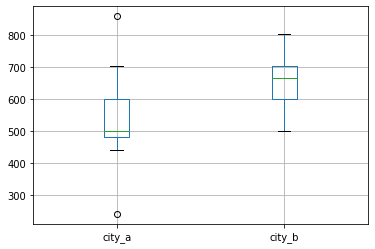

In [70]:
df = pd.DataFrame({
    'city_a': [240, 440, 455, 475, 475, 490, 490, 500, 500, 500, 530, 550, 578, 580, 620, 687, 694, 703, 859],
    'city_b': [500, 564, 590, 600, 600, 600, 645, 650, 660, 667, 689, 692, 700, 700, 705, 735, 760, 764, 805]
})
boxplot = df.boxplot(column=['city_a', 'city_b'])

In [72]:
data = pd.DataFrame({
  'value': [48, 44, 42.5, 40.5, 40.5, 39, 39, 38, 38, 38, 35, 33, 30.2, 30, 26, 19.3, 27, 21]
}
boxplot = df.boxplot(data)

SyntaxError: invalid syntax (<ipython-input-72-3357ed4ac9bb>, line 4)